In [83]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as tf
import torch.optim as optim
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

In [84]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        self.conv_first_layer = nn.Conv2d\
            (in_channels=1, out_channels=32, kernel_size=3, padding=1)

        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=3, stride=2)
        self.full_connected_layer = nn.Linear\
            (32 * 13 * 13, 10)
    
    def forward(self, x):
        x = self.conv_first_layer(x)
        x = self.relu(x)
        x = self.pool(x)

        x = x.view(x.size(0), -1)

        return self.full_connected_layer(x)

In [85]:
def show_image(row: tuple) -> None:
    image, label = row

    image = image.squeeze().numpy()
    
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

In [86]:
transform = tf.Compose([tf.ToTensor(), tf.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root="./data", download=True, train=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', download=True, train=False, transform=transform)

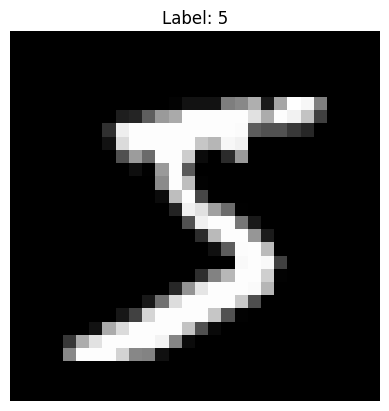

In [87]:
image, label = train_dataset[0]
show_image(train_dataset[0])

In [88]:
image.shape

torch.Size([1, 28, 28])

In [89]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=True)

In [90]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device

device(type='cpu')

In [91]:
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 3

In [92]:
for epoch in range(num_epochs):

    for images, labels in train_loader:

        print(f'Epoch: {epoch}')
        images, labels = images.to(device), labels.to(device)
        image = images[0]
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
    print(f'Epoch: {epoch}, Loss: {loss.item()}')
    

Epoch: 0
Shape for x: torch.Size([8, 1, 28, 28])
Shape after first layertorch.Size([8, 32, 28, 28])
Shape after relu torch.Size([8, 32, 28, 28])
Shape after max pooling torch.Size([8, 32, 13, 13])
Shape after flattening torch.Size([8, 5408])
Shape after FC layer torch.Size([8, 10])
Epoch: 0
Shape for x: torch.Size([8, 1, 28, 28])
Shape after first layertorch.Size([8, 32, 28, 28])
Shape after relu torch.Size([8, 32, 28, 28])
Shape after max pooling torch.Size([8, 32, 13, 13])
Shape after flattening torch.Size([8, 5408])
Shape after FC layer torch.Size([8, 10])
Epoch: 0
Shape for x: torch.Size([8, 1, 28, 28])
Shape after first layertorch.Size([8, 32, 28, 28])
Shape after relu torch.Size([8, 32, 28, 28])
Shape after max pooling torch.Size([8, 32, 13, 13])
Shape after flattening torch.Size([8, 5408])
Shape after FC layer torch.Size([8, 10])
Epoch: 0
Shape for x: torch.Size([8, 1, 28, 28])
Shape after first layertorch.Size([8, 32, 28, 28])
Shape after relu torch.Size([8, 32, 28, 28])
Shape 

In [93]:
loss.item()

0.010736486874520779